<a href="https://colab.research.google.com/github/erichbarreto/RESTIC36/blob/main/Atividade_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividade 9
Erich Barreto Pereira
Maria Fernanda Cunha da Silva

# Importação das bibliotecas

## Importação das bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Carregamento dos dados

In [ ]:
# Tentar carregar o arquivo baixado
try:
  dataset = pd.read_csv('https://raw.githubusercontent.com/erichbarreto/RESTIC36/refs/heads/main/top_insta_influencers_data.csv')
  print("Arquivo carregado com sucesso!")
except FileNotFoundError:
  print("Arquivo não encontrado. Verifique o nome ou caminho do arquivo.")


Arquivo carregado com sucesso!


In [ ]:
dataset.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
# Inicializar um DataFrame vazio para armazenar a análise


# Função para converter os valores de 'k', 'm', 'b' para números inteiros
def converteValores(value):
  if isinstance(value, str):
    if 'm' in value:
      return float(value.replace('m', '')) * 1_000_000
    elif 'k' in value:
      return float(value.replace('k', '')) * 1_000
    elif 'b' in value:
      return float(value.replace('b', '')) * 1_000_000_000
    else:
      return float(value)
  else:
    return value

def conversaoDados():
  analise_insta = pd.DataFrame()

  # Adicionar as colunas relevantes do dataset original
  analise_insta['Influenciador'] = dataset['channel_info']
  analise_insta['Classificacao'] = dataset['rank']

  # Aplicar a função de conversão para colunas relevantes
  analise_insta['Pontuacao'] = dataset['influence_score']
  analise_insta['Postagens'] = dataset['posts'].apply(converteValores)
  analise_insta['Seguidores'] = dataset['followers'].apply(converteValores)
  analise_insta['Media_Curtidas'] = dataset['avg_likes'].apply(converteValores)
  analise_insta['Media_Curtidas_Novas'] = dataset['new_post_avg_like'].apply(converteValores)
  analise_insta['Likes'] = dataset['total_likes'].apply(converteValores)

  # Converter a taxa de engajamento para um número decimal
  analise_insta["Taxa_Engajamento"] = dataset["60_day_eng_rate"].replace("%", "", regex=True)
  analise_insta["Taxa_Engajamento"] = analise_insta["Taxa_Engajamento"].astype(float) / 100

  # Adicionar a coluna de País
  analise_insta['País'] = dataset['country']

  #Preenchimento dos campos vazios por 0 ou serem excluídas, devido a ter linhas sem indicação de numero de taxa de engajamento ou com valores NaN
  analise_insta.fillna(0)
  analise_insta.dropna(subset=['Taxa_Engajamento'], inplace=True)

  # Variável dependente para a análise
  y = analise_insta['Taxa_Engajamento']
  return [analise_insta,y]


# Análise de correlação

       Classificação   Pontuação     Postagens    Seguidores  Media_Curtidas  \
count     199.000000  199.000000    199.000000  1.990000e+02    1.990000e+02   
mean      100.160804   81.814070   3516.884422  7.761256e+07    1.741310e+06   
std        57.825532    8.900153   3476.215047  7.381699e+07    2.100856e+06   
min         1.000000   22.000000     10.000000  3.280000e+07    6.510000e+04   
25%        50.500000   80.000000    950.000000  4.005000e+07    5.031000e+05   
50%       100.000000   84.000000   2100.000000  5.020000e+07    1.100000e+06   
75%       149.500000   86.000000   5050.000000  6.890000e+07    2.100000e+06   
max       200.000000   93.000000  17500.000000  4.758000e+08    1.540000e+07   

       Media_Curtidas_Novas         Likes  Taxa_Engajamento  
count          1.990000e+02  1.990000e+02        199.000000  
mean           1.214204e+06  3.670465e+09          0.019020  
std            1.861019e+06  5.573215e+09          0.033297  
min            0.000000e+00  1.

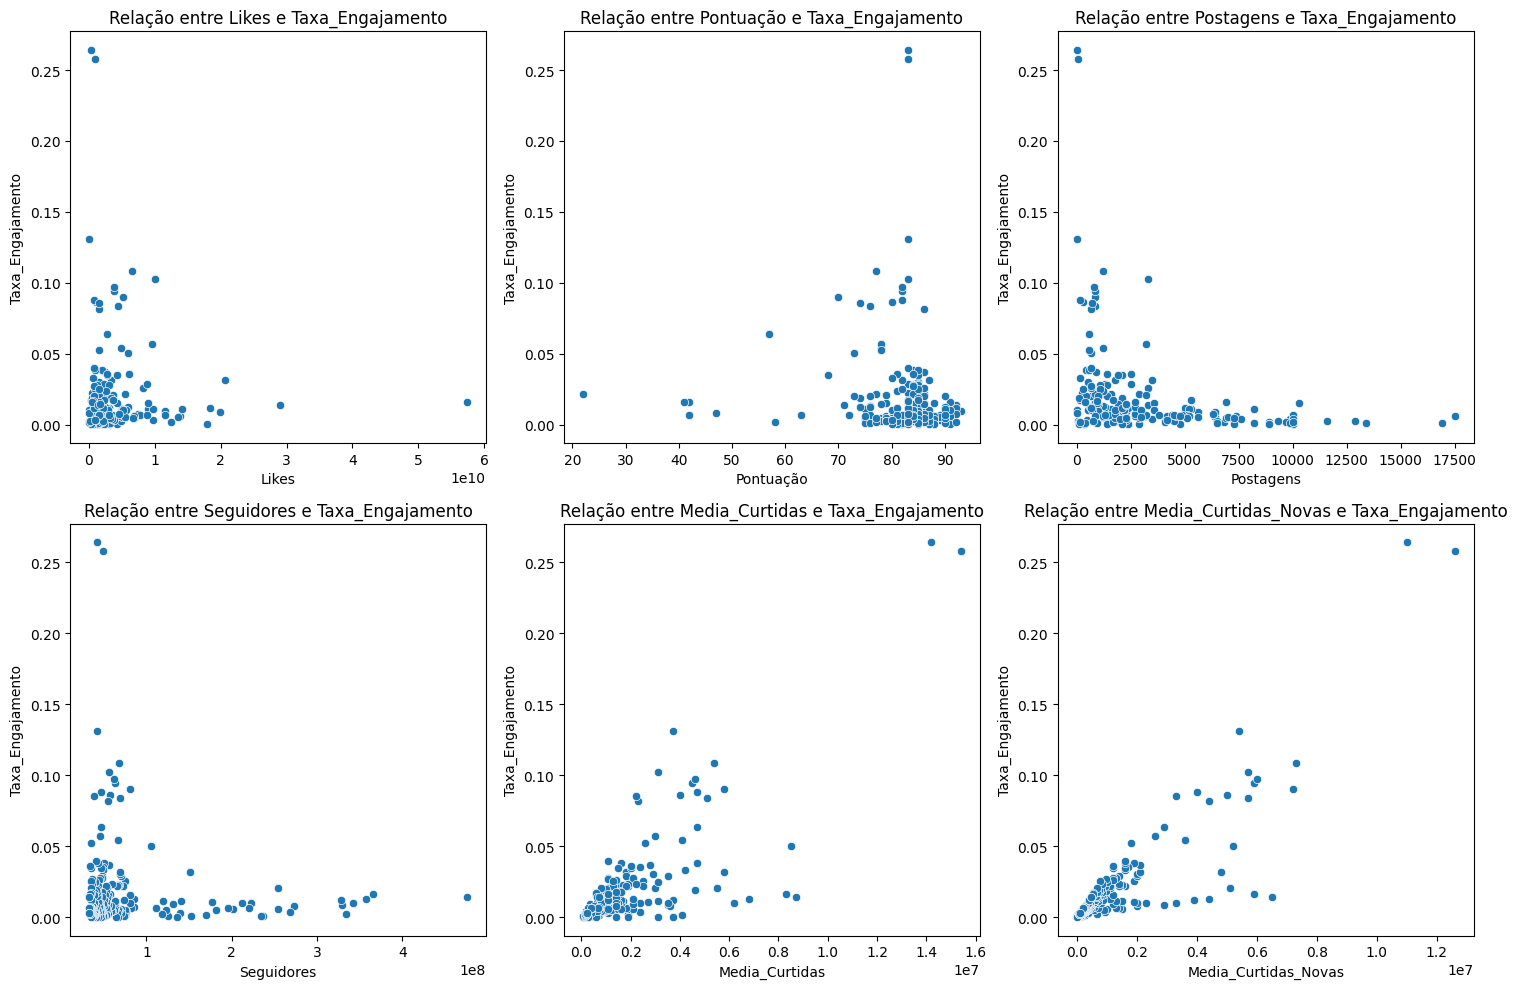

Taxa_Engajamento        1.000000
Media_Curtidas_Novas    0.869202
Media_Curtidas          0.754587
Likes                  -0.019524
Pontuação              -0.081891
Seguidores             -0.100905
Postagens              -0.324068
Name: Taxa_Engajamento, dtype: float64


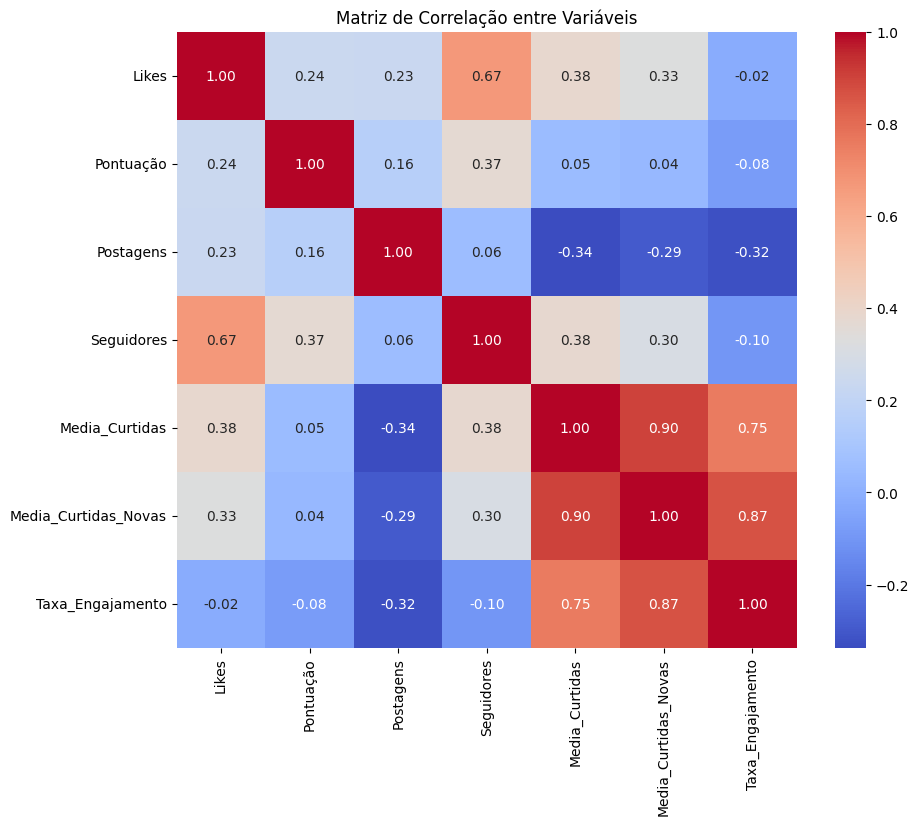

In [ ]:
[analise_insta,y] = conversaoDados()

ames_df_selected = analise_insta[['Likes','Pontuacao','Postagens','Seguidores','Media_Curtidas','Media_Curtidas_Novas','Taxa_Engajamento']].dropna()

# Criar scatter plots para cada uma das características selecionadas
plt.figure(figsize=(15, 10))
for i, column in enumerate(ames_df_selected.columns[:-1], 1):  # Exclui 'Taxa_Engajamento' da iteração
    plt.subplot(2, 3, i)  # Ajuste o layout conforme necessário
    sns.scatterplot(data=ames_df_selected, x=column, y='Taxa_Engajamento')
    plt.title(f'Relação entre {column} e Taxa_Engajamento')
    plt.xlabel(column)
    plt.ylabel('Taxa_Engajamento')

plt.tight_layout()
plt.show()


# Correlação entre as variáveis
correlation_matrix =  analise_insta[['Likes','Pontuacao','Postagens','Seguidores','Media_Curtidas','Media_Curtidas_Novas','Taxa_Engajamento']].corr()
print(correlation_matrix['Taxa_Engajamento'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de Correlação entre Variáveis")
plt.show()


# Análise dos dados com média de curtidas

Parâmetros Otimizados (Theta): [0.01881019 0.02672202]
Custo Final: 0.000255581565514362


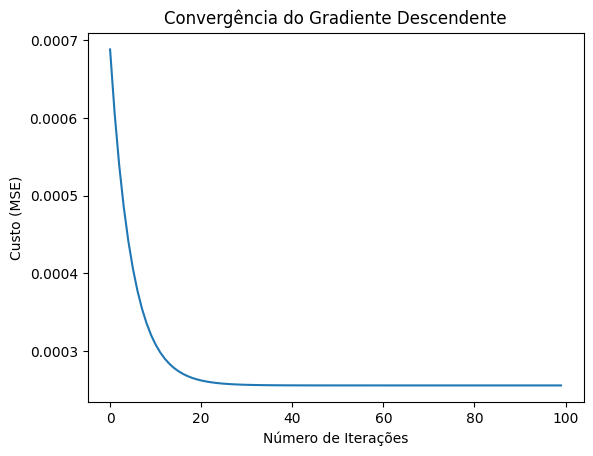

Erro Quadrático Médio no Teste: 0.00016719933786922564
R² no Teste: 0.45782711827322475


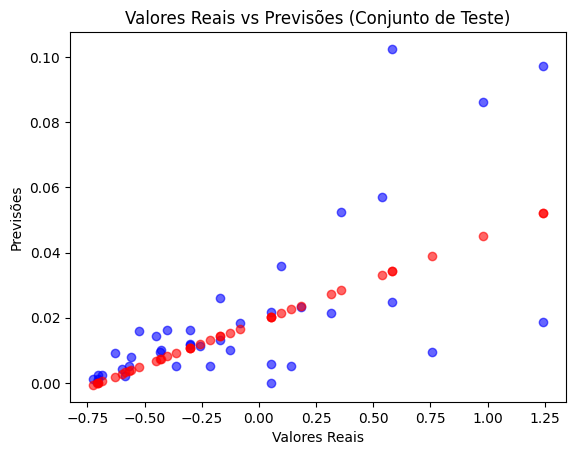

In [ ]:
#trazer dados
[analise_insta,y] = conversaoDados()

combinacao = ['Media_Curtidas']
X = analise_insta[combinacao]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados para melhorar a performance do modelo
normalizacao = StandardScaler()
X_train = normalizacao.fit_transform(X_train)
X_test = normalizacao.transform(X_test)


# Função de custo (MSE)
def funcaoCusto(X, y, theta):
    m = len(y)
    predicao = X @ theta
    custo = (1 / (2 * m)) * np.sum((predicao - y) ** 2)
    return custo

# Gradiente Descendente baseado no MSE
def funcaoGradiente(X, y, theta, alfa, num_iters):
    m = len(y)
    custo = []

    for i in range(num_iters):
        predicao = X @ theta
        gradiente = (1 / m) * X.T @ (predicao - y)
        theta -= alfa * gradiente
        custo.append(funcaoCusto(X, y, theta))

    return theta, custo

# Preparação dos dados
X = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Adiciona uma coluna de 1s para o intercepto
y = y_train.values.reshape(-1, 1)  # Certifica que y é uma matriz coluna

# Inicialização dos parâmetros
matrizInicio = np.zeros((X.shape[1], 1))
taxaAprendizado = 0.1  # Taxa de aprendizado
iteracoes = 100  # Número de iterações

# Aplicar gradiente descendente
vetorTheta, vetorCusto = funcaoGradiente(X, y, matrizInicio, taxaAprendizado, iteracoes)

print(f"Parâmetros Otimizados (Theta): {vetorTheta.flatten()}")
print(f"Custo Final: {vetorCusto[-1]}")

# Gráfico de Convergência
plt.plot(range(iteracoes), vetorCusto)
plt.title("Convergência do Gradiente Descendente")
plt.xlabel("Número de Iterações")
plt.ylabel("Custo (MSE)")
plt.show()

# Preparação dos dados de teste
X_test_prepared = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Adiciona uma coluna de 1s para o intercepto
y_test_values = y_test.values.reshape(-1, 1)  # Certifica que y_test é uma matriz coluna

# Fazer previsões no conjunto de teste
y_pred_test = X_test_prepared @ vetorTheta

# Avaliar o modelo no conjunto de teste
mse_test = funcaoCusto(X_test_prepared, y_test_values, vetorTheta)
r2_test = 1 - (np.sum((y_pred_test - y_test_values) ** 2) / np.sum((y_test_values - np.mean(y_test_values)) ** 2))

print(f"Erro Quadrático Médio no Teste: {mse_test}")
print(f"R² no Teste: {r2_test}")

# Valores reais
plt.scatter(X_test, y_test_values, color='blue', label='Valores Reais', alpha=0.6)

# Valores previstos
plt.scatter(X_test, y_pred_test, color='red', label='Valores Previstos', alpha=0.6)
plt.title("Valores Reais vs Previsões (Conjunto de Teste)")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.show()


## Comparação com mínimo quadrado

Variáveis independentes: ['Media_Curtidas']
Mean Squared Error: 0.00033439310786036023
R² Score: 0.4578361456789196
Coeficientes: [0.02672273]
Intercepto: 0.01881069182389937



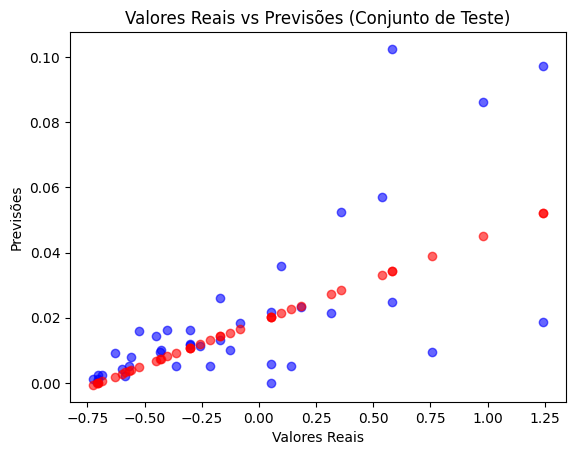

In [ ]:
#trazer dados
[analise_insta,y] = conversaoDados()

combinacao = ['Media_Curtidas']
X = analise_insta[combinacao]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados para melhorar a performance do modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Variáveis independentes: {combinacao}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}\n")

# Valores reais
plt.scatter(X_test, y_test_values, color='blue', label='Valores Reais', alpha=0.6)

# Valores previstos
plt.scatter(X_test, y_pred_test, color='red', label='Valores Previstos', alpha=0.6)
plt.title("Valores Reais vs Previsões (Conjunto de Teste)")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.show()

# Análise de dados com média de curtidas novas (Maior correlação)

Parâmetros Otimizados (Theta): [0.01869932 0.02993075]
Custo Final: 0.00015937948560092706


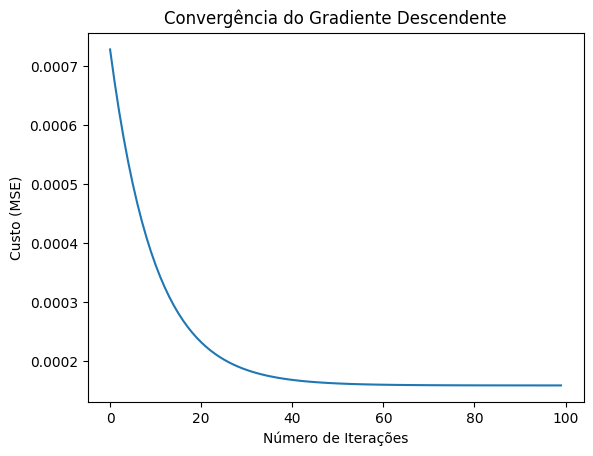

Erro Quadrático Médio no Teste: 3.919354245201825e-05
R² no Teste: 0.8729081339250769


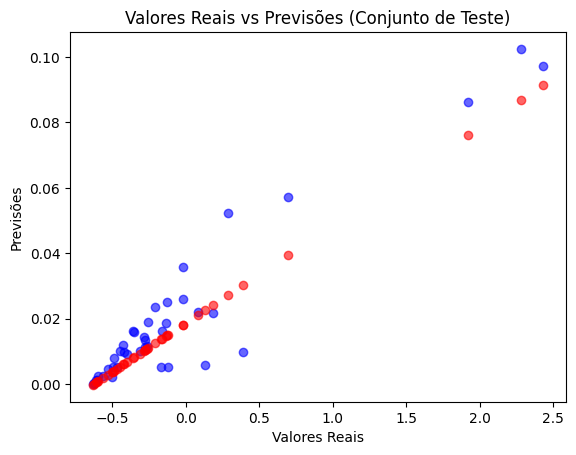

In [22]:
#trazer dados
[analise_insta,y] = conversaoDados()

combinacao = ['Media_Curtidas_Novas']
X = analise_insta[combinacao]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados para melhorar a performance do modelo
normalizacao = StandardScaler()
X_train = normalizacao.fit_transform(X_train)
X_test = normalizacao.transform(X_test)


# Função de custo (MSE)
def funcaoCusto(X, y, theta):
    m = len(y)
    predicao = X @ theta
    custo = (1 / (2 * m)) * np.sum((predicao - y) ** 2)
    return custo

# Gradiente Descendente baseado no MSE
def funcaoGradiente(X, y, theta, alfa, iteracoes):
    m = len(y)
    custo = []

    for i in range(iteracoes):
        predicao = X @ theta
        gradiente = (1 / m) * X.T @ (predicao - y)
        theta -= alfa * gradiente
        custo.append(funcaoCusto(X, y, theta))

    return theta, custo

# Preparação dos dados
X = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Adiciona uma coluna de 1s para o intercepto
y = y_train.values.reshape(-1, 1)  # Certifica que y é uma matriz coluna

# Inicialização dos parâmetros
matrizInicio = np.zeros((X.shape[1], 1))
taxaAprendizado = 0.05  # Taxa de aprendizado
iteracoes = 100  # Número de iterações

# Aplicar gradiente descendente
vetorTheta, vetorCusto = funcaoGradiente(X, y, matrizInicio, taxaAprendizado, iteracoes)

print(f"Parâmetros Otimizados (Theta): {vetorTheta.flatten()}")
print(f"Custo Final: {vetorCusto[-1]}")

# Gráfico de Convergência
plt.plot(range(iteracoes), vetorCusto)
plt.title("Convergência do Gradiente Descendente")
plt.xlabel("Número de Iterações")
plt.ylabel("Custo (MSE)")
plt.show()

# Preparação dos dados de teste
X_test_prepared = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Adiciona uma coluna de 1s para o intercepto
y_test_values = y_test.values.reshape(-1, 1)  # Certifica que y_test é uma matriz coluna

# Fazer previsões no conjunto de teste
y_pred_test = X_test_prepared @ vetorTheta

# Avaliar o modelo no conjunto de teste
mse_test = funcaoCusto(X_test_prepared, y_test_values, vetorTheta)
r2_test = 1 - (np.sum((y_pred_test - y_test_values) ** 2) / np.sum((y_test_values - np.mean(y_test_values)) ** 2))

print(f"Erro Quadrático Médio no Teste: {mse_test}")
print(f"R² no Teste: {r2_test}")

# Valores reais
plt.scatter(X_test, y_test_values, color='blue', label='Valores Reais', alpha=0.6)

# Valores previstos
plt.scatter(X_test, y_pred_test, color='red', label='Valores Previstos', alpha=0.6)
plt.title("Valores Reais vs Previsões (Conjunto de Teste)")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.show()


Análise da relação entre a Taxa de engajamento e a quantidade de postagens

Variáveis independentes: ['Media_Curtidas_Novas']
Mean Squared Error: 7.723164099972028e-05
R² Score: 0.8747814976574344
Coeficientes: [0.03010901]
Intercepto: 0.01881069182389937



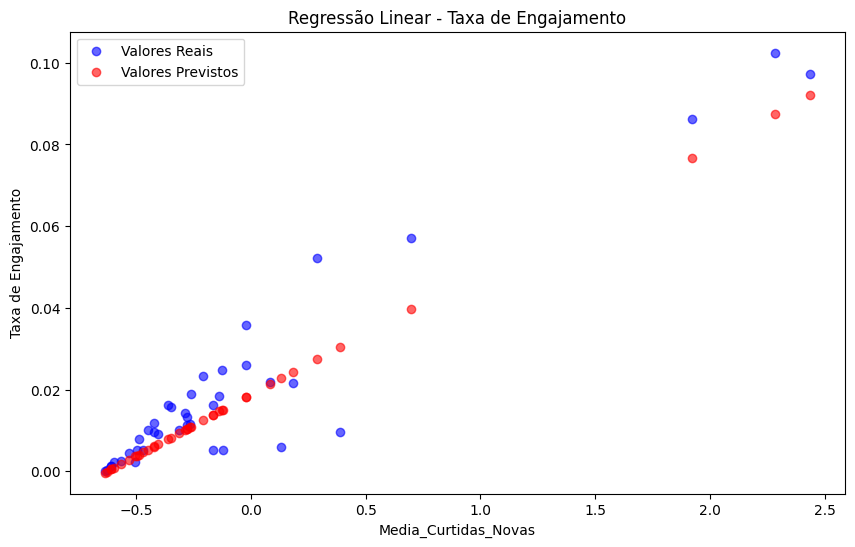

In [17]:
#trazer dados
[analise_insta,y] = conversaoDados()

combinacao = ['Media_Curtidas_Novas']
X = analise_insta[combinacao]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados para melhorar a performance do modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Variáveis independentes: {combinacao}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}\n")
# Plotando os valores reais e previstos
plt.figure(figsize=(10, 6))

# Valores reais
plt.scatter(X_test, y_test, color='blue', label='Valores Reais', alpha=0.6)

# Valores previstos
plt.scatter(X_test, y_pred, color='red', label='Valores Previstos', alpha=0.6)

plt.title("Regressão Linear - Taxa de Engajamento")
plt.xlabel(combinacao[0])
plt.ylabel("Taxa de Engajamento")
plt.legend()
plt.show()

# Mais de uma variável independente

## Método dos mínimos quadrados

Variáveis independentes: ['Seguidores', 'Media_Curtidas_Novas']
Mean Squared Error: 2.9868824423761273e-05
R² Score: 0.9515725755317049
Coeficientes: [-0.01442656  0.03476076]
Intercepto: 0.01881069182389937



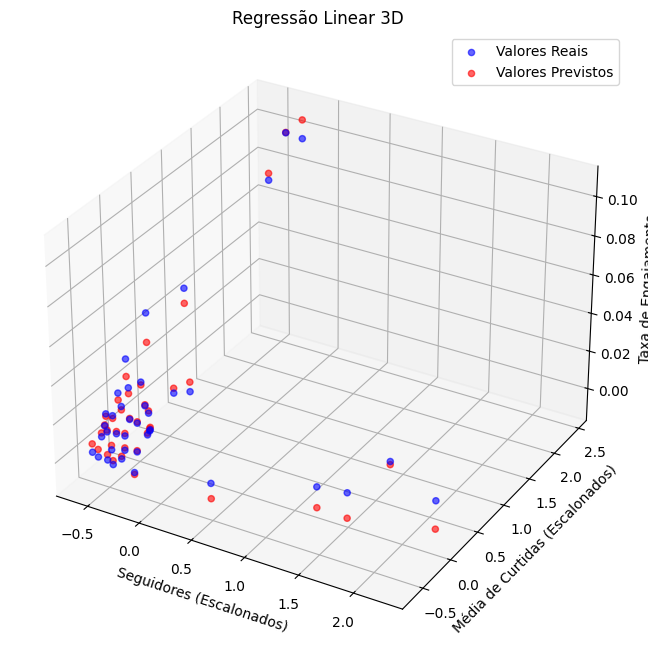

In [36]:
# @title
#testando com seguidores, likes e media de curtidas
combinacao = ['Seguidores', 'Media_Curtidas_Novas']
X = analise_insta[combinacao]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados para melhorar a performance do modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Variáveis independentes: {combinacao}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}\n")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Posição no espaço
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='blue', label='Valores Reais', alpha=0.6)
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', label='Valores Previstos', alpha=0.6)

# Configurações dos eixos
ax.set_title("Regressão Linear 3D")
ax.set_xlabel("Seguidores (Escalonados)")
ax.set_ylabel("Média de Curtidas (Escalonados)")
ax.set_zlabel("Taxa de Engajamento")

ax.legend()
plt.show()

## Modelo do gradiente descendente



Parâmetros Otimizados (Theta): [ 0.01880988 -0.01439915  0.03473331]
R² Score: 0.9517529300394932
Mean Squared Error (MSE): 2.9757586273347344e-05
Custo Final (Treinamento): 6.611441591095929e-05


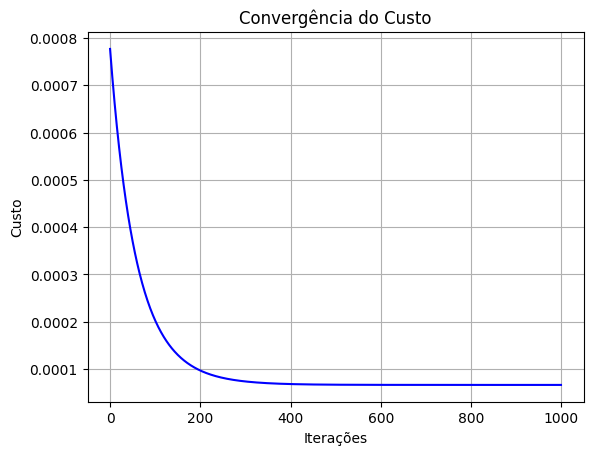

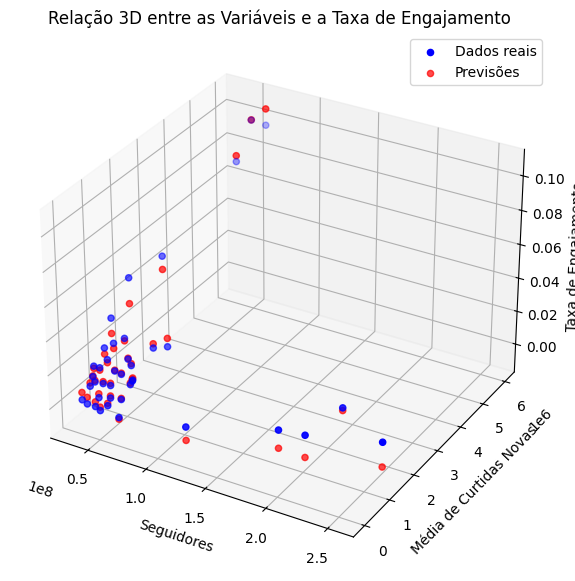

In [48]:
# Seleção das variáveis independentes e dependente
combinacao = ['Seguidores', 'Media_Curtidas_Novas']
X = analise_insta[combinacao]
y = analise_insta['Taxa_Engajamento']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonamento dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adicionar a coluna de intercepto para o gradiente descendente
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Inicialização dos parâmetros
theta = np.zeros((X_train_scaled.shape[1], 1))
alfa = 0.01  # Taxa de aprendizado
iteracoes = 1000  # Número de iterações

# Função de custo (MSE)
def funcaoCusto(X, y, theta):
    m = len(y)
    predicao = X @ theta
    custo = (1 / (2 * m)) * np.sum((predicao - y) ** 2)
    return custo

# Gradiente descendente
def funcaoGradiente(X, y, theta, alfa, iteracoes):
    m = len(y)
    dadosCusto = []

    for i in range(iteracoes):
        predicao = X @ theta
        gradients = (1 / m) * X.T @ (predicao - y)
        theta -= alfa * gradients
        dadosCusto.append(funcaoCusto(X, y, theta))

    return theta, dadosCusto

# Preparar os dados de treino
y_train = y_train.values.reshape(-1, 1)  # Certificar que y é uma matriz coluna

# Aplicar gradiente descendente
theta_opt, cost_history = funcaoGradiente(X_train_scaled, y_train, theta, alfa, iteracoes)

# Previsões no conjunto de teste
y_test = y_test.values.reshape(-1, 1)  # Certificar que y_test é uma matriz coluna
y_pred = X_test_scaled @ theta_opt

# Cálculo do MSE e R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.plot(range(iteracoes), cost_history, label="Custo", color='blue')
plt.title("Convergência do Custo")
plt.xlabel("Iterações")
plt.ylabel("Custo")
plt.grid(True)

print("\n")

# Exibir resultados
print(f"Parâmetros Otimizados (Theta): {theta_opt.flatten()}")
print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Custo Final (Treinamento): {cost_history[-1]}")

# Visualização 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Dados reais
ax.scatter(X_test['Seguidores'], X_test['Media_Curtidas_Novas'], y_test, color='blue', label='Dados reais')

# Previsões
ax.scatter(X_test['Seguidores'], X_test['Media_Curtidas_Novas'], y_pred, color='red', label='Previsões', alpha=0.7)

# Rótulos e título
ax.set_title("Relação 3D entre as Variáveis e a Taxa de Engajamento")
ax.set_xlabel("Seguidores")
ax.set_ylabel("Média de Curtidas Novas")
ax.set_zlabel("Taxa de Engajamento")
ax.legend()

plt.show()


## RIDGE E LASSO

=== Ridge ===
R²: 0.9519
MSE: 0.000030
Parâmetros Otimizados: [ 0.01880988 -0.01438138  0.03470587]

=== Lasso ===
R²: 0.9567
MSE: 0.000027
Parâmetros Otimizados: [ 0.01880988 -0.01347196  0.03380612]


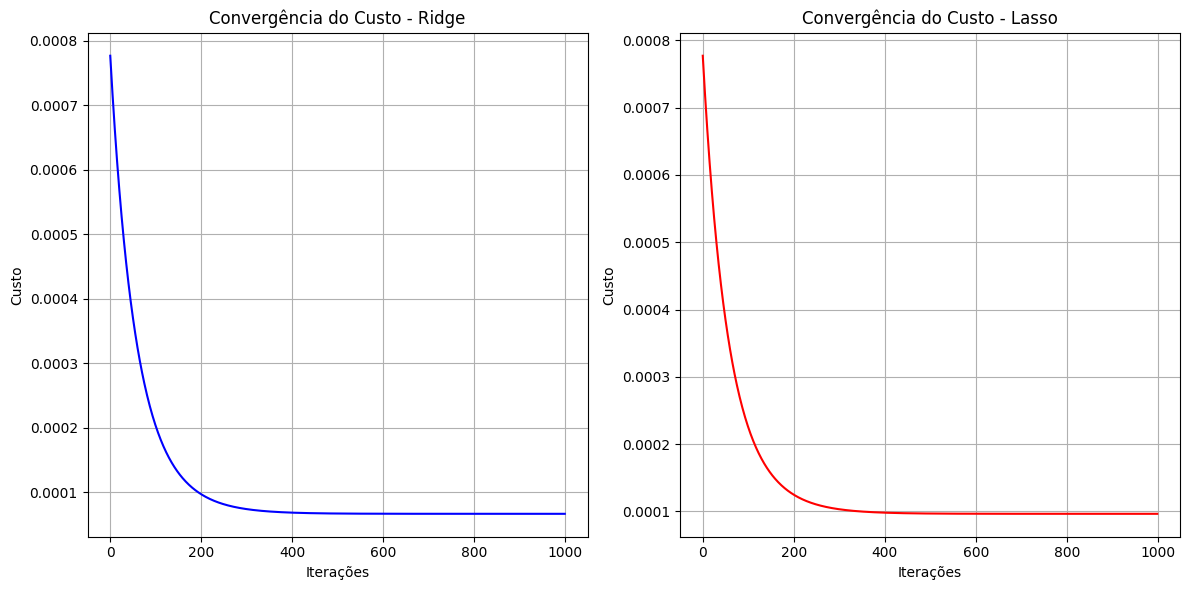

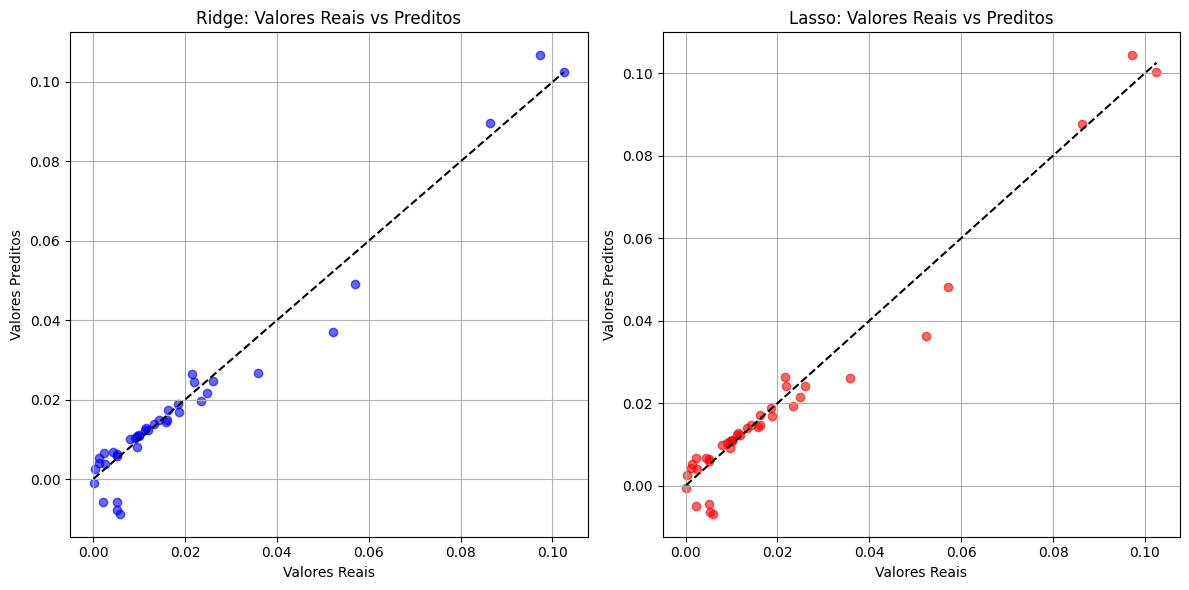

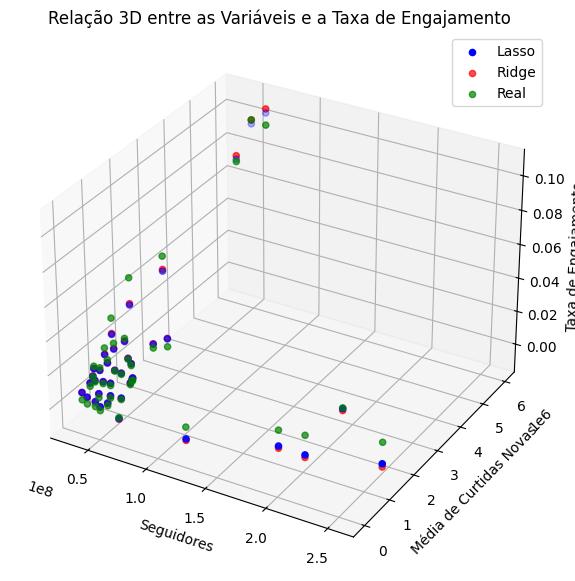

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separar as variáveis dependente e independentes
X = analise_insta[['Seguidores', 'Media_Curtidas_Novas']]
y = analise_insta['Taxa_Engajamento']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adicionar uma coluna de 1s para o intercepto
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Funções de custo para Ridge e Lasso
def compute_cost_ridge(X, y, theta, alpha):
  m = len(y)
  predictions = X @ theta
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2) + (alpha / (2 * m)) * np.sum(theta[1:] ** 2)  # L2
  return cost

def compute_cost_lasso(X, y, theta, alpha):
  m = len(y)
  predictions = X @ theta
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2) + (alpha / m) * np.sum(np.abs(theta[1:]))  # L1
  return cost

# Gradiente descendente para Ridge e Lasso
def gradient_descent_ridge(X, y, theta, learning_rate, alpha, num_iters):
  m = len(y)
  cost_history = []

  for _ in range(num_iters):
    predictions = X @ theta
    gradients = (1 / m) * X.T @ (predictions - y) + (alpha / m) * np.r_[[[0]], theta[1:]]  # L2 regularização
    theta -= learning_rate * gradients
    cost_history.append(compute_cost_ridge(X, y, theta, alpha))

  return theta, cost_history

def gradient_descent_lasso(X, y, theta, learning_rate, alpha, num_iters):
  m = len(y)
  cost_history = []

  for _ in range(num_iters):
    predictions = X @ theta
    gradients = (1 / m) * X.T @ (predictions - y)

    # Lasso regularização (subtração do termo L1)
    theta[1:] -= learning_rate * (gradients[1:] + alpha * np.sign(theta[1:]) / m)
    theta[0] -= learning_rate * gradients[0]  # Intercepto não regularizado
    cost_history.append(compute_cost_lasso(X, y, theta, alpha))

  return theta, cost_history

# Inicialização
theta_ridge = np.zeros((X_train_scaled.shape[1], 1))
theta_lasso = np.zeros((X_train_scaled.shape[1], 1))
learning_rate = 0.01
alpha = 0.1  # Regularização
num_iters = 1000

# Aplicação do gradiente descendente
theta_ridge_opt, cost_history_ridge = gradient_descent_ridge(X_train_scaled, y_train, theta_ridge, learning_rate, alpha, num_iters)
theta_lasso_opt, cost_history_lasso = gradient_descent_lasso(X_train_scaled, y_train, theta_lasso, learning_rate, alpha, num_iters)

# Predições
ridge_predictions = X_test_scaled @ theta_ridge_opt
lasso_predictions = X_test_scaled @ theta_lasso_opt

# Avaliação
from sklearn.metrics import r2_score, mean_squared_error

ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

# Resultados
print("=== Ridge ===")
print(f"R²: {ridge_r2:.4f}")
print(f"MSE: {ridge_mse:.6f}")
print(f"Parâmetros Otimizados: {theta_ridge_opt.flatten()}")

print("\n=== Lasso ===")
print(f"R²: {lasso_r2:.4f}")
print(f"MSE: {lasso_mse:.6f}")
print(f"Parâmetros Otimizados: {theta_lasso_opt.flatten()}")

# Gráficos de convergência do custo
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(num_iters), cost_history_ridge, label="Ridge", color='blue')
plt.title("Convergência do Custo - Ridge")
plt.xlabel("Iterações")
plt.ylabel("Custo")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(num_iters), cost_history_lasso, label="Lasso", color='red')
plt.title("Convergência do Custo - Lasso")
plt.xlabel("Iterações")
plt.ylabel("Custo")
plt.grid(True)

plt.tight_layout()
plt.show()

# Gráficos de dispersão: Valores reais vs Preditos
plt.figure(figsize=(12, 6))

# Ridge
plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')  # Linha do modelo
plt.title("Ridge: Valores Reais vs Preditos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.grid(True)

# Lasso
plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_predictions, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')  # Linha do modelo
plt.title("Lasso: Valores Reais vs Preditos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualização 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Dados reais
ax.scatter(X_test['Seguidores'], X_test['Media_Curtidas_Novas'], lasso_predictions, color='blue', label='Lasso')

# Previsões
ax.scatter(X_test['Seguidores'], X_test['Media_Curtidas_Novas'], ridge_predictions, color='red', label='Ridge', alpha=0.7)

# Previsões
ax.scatter(X_test['Seguidores'], X_test['Media_Curtidas_Novas'], y_test, color='green', label='Real', alpha=0.7)

# Rótulos e título
ax.set_title("Relação 3D entre as Variáveis e a Taxa de Engajamento")
ax.set_xlabel("Seguidores")
ax.set_ylabel("Média de Curtidas Novas")
ax.set_zlabel("Taxa de Engajamento")
ax.legend()

plt.show()

